### For the purpose of illustrating how to run the code, we replicate the results of POTION in Figure 2. 

In [4]:
import pickle
import seaborn
import pandas as pd
import matplotlib.pylab as plt

%matplotlib inline 
%load_ext autoreload

plt.style.use('seaborn-paper')
seaborn.set_context('paper', font_scale=2.2)
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.weight'] = 'medium'

### 0. Make sure you are under the `src/` folder. Create a folder to store results in the upper-level directory, i.e.,  `mkdir ../result`

### 1.  Run the following command to attack the Email network.

The arguments to main.py are:
   - `--graph_type:` specify which network to attack.
   - `--mode:` specify the trade-off parameters $(\alpha_1, \alpha_2, \alpha_3)$, e.g., "equalAlpha" means $(\alpha_1=1/3, \alpha_2=1/3, \alpha_3=1/3)$.
   - `--numExp:` the number of networks to attack. For real-world networks (including the Airport, Email, and Brain networks), this parameters is always set to $1$; for synthetic networks it is set to $30$, i.e., we attack $30$ randomly generated synthetic networks.
   - `--weighted:` specify whether the network is weighted.
   - `--save_result:` whether to save the attacked results.


In [ ]:
run main.py --graph_type=Email --mode=equalAlpha --numExp=1 --weighted=0 --save_result=1

### 2. Next, we simulate the SIS spreading dynamics on both the original and attacked networks. 


The complete argument list of the `sis_simulations.py` function is as follows:
   - `--graph_type:` specify which network to attack.
   - `--numExp:` the number of networks to attack. For real-world networks (including the Airport, Email, and Brain networks), this parameters is always set to $1$; for synthetic networks it is set to $30$, i.e., we attack $30$ randomly generated synthetic networks.
   - `--numSim:` the number of simulations to run;
   - `--numCPU:` the number of CPUs to run the simulation; the default is $4$;
   - `--gamma:` the recovery rate of the SIS dynamics;
   - `--tau:` the transmission rate of the SIS dynamics;
   - `--weighted:` whether the network is weighted.


In [ ]:
run sis_simulations.py --graph_type=Email --numExp=1 --gamma=0.24 --tau=0.06 --weighted=weighted --numSim=2000

### 3. After the simulation is done, we generate the resulting plot with the following code:

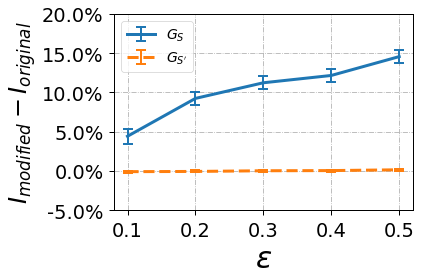

In [25]:
graph_type = 'Email'
graph_weight = 'unweighted'

## the recovery and transimission parameters for the SIS dynamics
GAMMA = 0.24
TAU = 0.06
numExp = 1 if graph_type in ['Email', 'Airport', 'Brain'] else 30

D = []
D_err = []
with open('../result/{}/{}-SIS/Gamma-{:.2f}---Tau-{:.2f}/{}_numExp_{}_SIS_equalAlpha.p'.format(\
                                                graph_weight, graph_type, GAMMA, TAU, graph_type, numExp), 'rb') as fid:
    data = pickle.load(fid)
data = data[~(data['ratio targets'].isin([0]) & data['ratio bystanders'].isin([0]))]
data = data.dropna()

SP_err = []
Key = 'ratio bystanders'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    SP_err.append((a-b).sem() * 1.96)

S_err = []
Key = 'ratio targets'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
# for budget in [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    S_err.append((a-b).sem() * 1.96)

S_attacked = data.pivot_table(index=['graph', 'budget'])['ratio targets']['attacked']
S_original = data.pivot_table(index=['graph', 'budget'])['ratio targets']['original']
SP_attacked = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['attacked']
SP_original = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['original']
S_diff  = S_attacked - S_original
SP_diff = SP_attacked - SP_original
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

x = [0.1, 0.2, 0.3, 0.4, 0.5]
plt.errorbar(x, S_diff, yerr=S_err, label='$G_S$', linewidth=3, 
             markersize=5, capsize=5, elinewidth=2, markeredgewidth=2)
plt.errorbar(x, SP_diff, yerr=SP_err,  label='$G_{S^\prime}$', linewidth=3,
             markersize=5, linestyle='dashed', capsize=5, elinewidth=2, markeredgewidth=2)
D.append(SP_diff)
D_err.append(SP_err)
    
ax = plt.gca()
plt.yticks(ax.get_yticks(),  ['%.1f%%' % (i*100) for i in ax.get_yticks()])
# plt.xticks(ax.get_xticks(), [ '10%', '20%', '30%', '40%', '50%'])
plt.xlabel('$\epsilon$', fontsize=30)
plt.ylabel('$I_{modified} - I_{original}$', fontsize=24)
plt.legend(loc='upper left', prop={'weight':'bold', 'size': 14})
plt.grid(linestyle='-.')
plt.tight_layout()

### The experimental results for the Airport network are replicated as follows:

1. `run main.py --graph_type=Airport --mode=equalAlpha --numExp=1 --weighted=1 --save_result=1`;
2. `run sis_simulations.py --graph_type=Email --numExp=1 --gamma=0.24 --tau=0.2 --weighted=weighted --numSim=2000`;
3. run the following code to generate the plot:

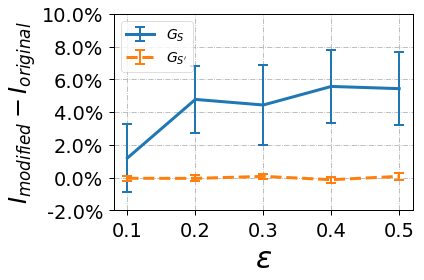

In [26]:
graph_type = 'Airport'
graph_weight = 'weighted'

## the recovery and transimission parameters for the SIS dynamics
GAMMA = 0.24
TAU = 0.2
numExp = 1 if graph_type in ['Email', 'Airport', 'Brain'] else 30

D = []
D_err = []
with open('../result/{}/{}-SIS/Gamma-{:.2f}---Tau-{:.2f}/{}_numExp_{}_SIS_equalAlpha.p'.format(\
                                                graph_weight, graph_type, GAMMA, TAU, graph_type, numExp), 'rb') as fid:
    data = pickle.load(fid)
data = data[~(data['ratio targets'].isin([0]) & data['ratio bystanders'].isin([0]))]
data = data.dropna()

SP_err = []
Key = 'ratio bystanders'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    SP_err.append((a-b).sem() * 1.96)

S_err = []
Key = 'ratio targets'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
# for budget in [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    S_err.append((a-b).sem() * 1.96)

S_attacked = data.pivot_table(index=['graph', 'budget'])['ratio targets']['attacked']
S_original = data.pivot_table(index=['graph', 'budget'])['ratio targets']['original']
SP_attacked = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['attacked']
SP_original = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['original']
S_diff  = S_attacked - S_original
SP_diff = SP_attacked - SP_original
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

x = [0.1, 0.2, 0.3, 0.4, 0.5]
plt.errorbar(x, S_diff, yerr=S_err, label='$G_S$', linewidth=3, 
             markersize=5, capsize=5, elinewidth=2, markeredgewidth=2)
plt.errorbar(x, SP_diff, yerr=SP_err,  label='$G_{S^\prime}$', linewidth=3,
             markersize=5, linestyle='dashed', capsize=5, elinewidth=2, markeredgewidth=2)
D.append(SP_diff)
D_err.append(SP_err)
    
ax = plt.gca()
plt.yticks(ax.get_yticks(),  ['%.1f%%' % (i*100) for i in ax.get_yticks()])
# plt.xticks(ax.get_xticks(), [ '10%', '20%', '30%', '40%', '50%'])
plt.xlabel('$\epsilon$', fontsize=30)
plt.ylabel('$I_{modified} - I_{original}$', fontsize=24)
plt.legend(loc='upper left', prop={'weight':'bold', 'size': 14})
plt.grid(linestyle='-.')
plt.tight_layout()

### The experimental results for the Brain network are replicated as follows:

1. `run main.py --graph_type=Brain --mode=equalAlpha --numExp=1 --weighted=1 --save_result=1`;
2. `run sis_simulations.py --graph_type=Email --numExp=1 --gamma=0.24 --tau=0.2 --weighted=weighted --numSim=2000`;
3. run the following code to generate the plot:

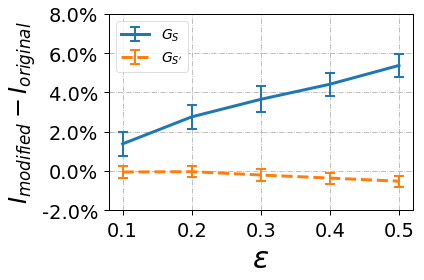

In [27]:
graph_type = 'Brain'
graph_weight = 'weighted'

## the recovery and transimission parameters for the SIS dynamics
GAMMA = 0.24
TAU = 0.2
numExp = 1 if graph_type in ['Email', 'Airport', 'Brain'] else 30

D = []
D_err = []
with open('../result/{}/{}-SIS/Gamma-{:.2f}---Tau-{:.2f}/{}_numExp_{}_SIS_equalAlpha.p'.format(\
                                                graph_weight, graph_type, GAMMA, TAU, graph_type, numExp), 'rb') as fid:
    data = pickle.load(fid)
data = data[~(data['ratio targets'].isin([0]) & data['ratio bystanders'].isin([0]))]
data = data.dropna()

SP_err = []
Key = 'ratio bystanders'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    SP_err.append((a-b).sem() * 1.96)

S_err = []
Key = 'ratio targets'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
# for budget in [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    S_err.append((a-b).sem() * 1.96)

S_attacked = data.pivot_table(index=['graph', 'budget'])['ratio targets']['attacked']
S_original = data.pivot_table(index=['graph', 'budget'])['ratio targets']['original']
SP_attacked = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['attacked']
SP_original = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['original']
S_diff  = S_attacked - S_original
SP_diff = SP_attacked - SP_original
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

x = [0.1, 0.2, 0.3, 0.4, 0.5]
plt.errorbar(x, S_diff, yerr=S_err, label='$G_S$', linewidth=3, 
             markersize=5, capsize=5, elinewidth=2, markeredgewidth=2)
plt.errorbar(x, SP_diff, yerr=SP_err,  label='$G_{S^\prime}$', linewidth=3,
             markersize=5, linestyle='dashed', capsize=5, elinewidth=2, markeredgewidth=2)
D.append(SP_diff)
D_err.append(SP_err)
    
ax = plt.gca()
plt.yticks(ax.get_yticks(),  ['%.1f%%' % (i*100) for i in ax.get_yticks()])
# plt.xticks(ax.get_xticks(), [ '10%', '20%', '30%', '40%', '50%'])
plt.xlabel('$\epsilon$', fontsize=30)
plt.ylabel('$I_{modified} - I_{original}$', fontsize=24)
plt.legend(loc='upper left', prop={'weight':'bold', 'size': 14})
plt.grid(linestyle='-.')
plt.tight_layout()

### In order to run the attacking algorithm on other networks beyong those in the paper, please customize the two functions located [here](https://github.com/marsplus/POTION/blob/935a7c7e091efa9d716543f300305f89b625418d/src/utils.py#L74-L143):
   1. `gen_graph`;
   2. `select_target_subgraph`.